<a href="https://colab.research.google.com/github/gabrielnichio/Validation-Metrics-for-Classifications/blob/main/validation_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validation Metrics

I created this notebook to study and practice about validation metrics in classification predictions.

Dataset contains data about lung cancer: https://www.kaggle.com/datasets/samuelotiattakorah/lung-cancer-data/data.

The objective is to predict whether a person has Lung Cancer or not.

In [49]:
import pandas as pd

In [50]:
data = pd.read_csv('/content/lung-cancer-survey.csv')

In [51]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [53]:
data['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
YES,270
NO,39


# Data Manipulation

I'm not going to transform the data to apply one-hot-encoding and other stuff because the objective here is to study validation metrics only.

In [54]:
data['GENDER'] = data['GENDER'].map({'M': 1, 'F': 2})
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 0, 'NO': 1})

In [55]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


# Dividing the dataset

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x = data.drop(columns='LUNG_CANCER')
y = data['LUNG_CANCER']

In [58]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.15, random_state=5, stratify=y)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, stratify=y, random_state=5)

# Classification Model

I'll create a simple classification model using random forest.

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
model = RandomForestClassifier(random_state=5, max_depth=5)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=5)

In [61]:
y_pred = model.predict(x_val)

In [62]:
print(f'Training accuracy: {model.score(x_train, y_train)}')

Training accuracy: 0.9489795918367347


# Accuracy

The first and most simple evaluation metric is the Accuracy. It refers to how much the model could predict right.

In [63]:
print(f'Model Accuracy: {model.score(x_val, y_val)}')

Model Accuracy: 0.9090909090909091


Although is a very good accuracy value, this is not enought. We are talking about cancer, so we need to check if we are predicting both classes ('YES', 'NO') right.

# Confusion Matrix

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

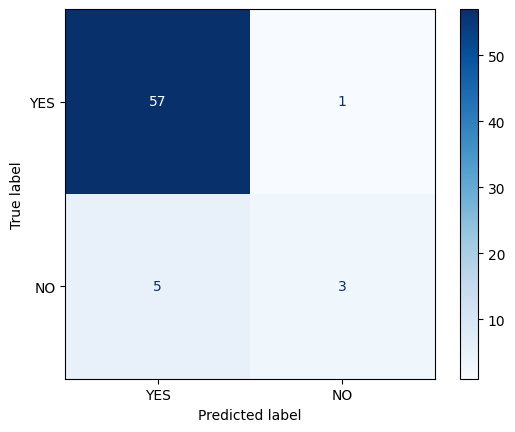

In [65]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, cmap='Blues', display_labels=['YES', 'NO']);

# Classification report

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_val, y_pred, target_names=['YES', 'NO']));

              precision    recall  f1-score   support

         YES       0.92      0.98      0.95        58
          NO       0.75      0.38      0.50         8

    accuracy                           0.91        66
   macro avg       0.83      0.68      0.72        66
weighted avg       0.90      0.91      0.90        66



We can see that we have just 2 False Negative. The best of the cases would be 0, this may be done by applying feature selection or hyperparameter tuning.

But there are 5 false positives in 8 cases. This may have happened because the data is unbalaced.

# Using Cross-Validation for more robust evaluation

In this section I'm going to evaluate the predictions considering the class 'NO'.

So a false positive would be if the classifier predicted NO and the real value is YES.

A false negative is when the classifier predicts YES and the real value is NO.

In [68]:
def confidence_interval(results):
  mean = results['test_score'].mean()
  deviation = results['test_score'].std()
  print(f'Confidence Interval: [{mean - 2*deviation}, {min(mean+2*deviation, 1)}]')

#Obtaining the precision

Precision takes into account the values predicted and the false positives.

Precision = TP / TP + FP

TP: true positives
FP: false positives



In [69]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [70]:
model = RandomForestClassifier(max_depth=5, random_state=5)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_validate(model, x, y, cv=skf, scoring='accuracy')
confidence_interval(cv_results)

Confidence Interval: [0.7870920272603447, 0.9841706723042417]


# Obtaining the recall

The recall takes into account the false negatives.

Recall = TP / TP + FN

In [71]:
model = RandomForestClassifier(max_depth=5, random_state=5)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_validate(model, x, y, cv=skf, scoring='recall')
confidence_interval(cv_results)

Confidence Interval: [0.13503947155726564, 0.6649605284427345]


# Using balacing manipulation to see if we can improve the results

In this case I'm trying to decrease the number of FN

## Oversampling


In [72]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

In [74]:
model = RandomForestClassifier(max_depth=5, random_state=5)
pipeline = imbpipeline([('oversample', SMOTE()), ('randomforest', model)])

In [76]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_validate(pipeline, x, y, cv=skf, scoring='recall')
confidence_interval(cv_results)

Confidence Interval: [0.6175056781934227, 0.8396371789494343]


Great result with oversampling

## Undersampling

In [77]:
from imblearn.under_sampling import NearMiss

In [78]:
model = RandomForestClassifier(max_depth=5, random_state=5)
pipeline = imbpipeline([('oversample', NearMiss()), ('randomforest', model)])

In [79]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_validate(pipeline, x, y, cv=skf, scoring='recall')
confidence_interval(cv_results)

Confidence Interval: [0.7121431222826493, 0.9259521158125887]


Even greater with undersampling

# Testing the model with undersampling

In [80]:
undersample = NearMiss()
x_balanced, y_balanced = undersample.fit_resample(x, y)

In [81]:
model = RandomForestClassifier(max_depth=5, random_state=5)
model.fit(x_balanced, y_balanced)

y_pred = model.predict(x_test)

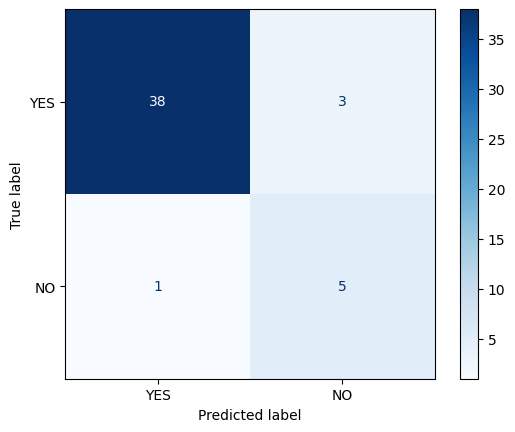

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', display_labels=['YES', 'NO']);

In [84]:
print(classification_report(y_test, y_pred, target_names=['YES', 'NO']))

              precision    recall  f1-score   support

         YES       0.97      0.93      0.95        41
          NO       0.62      0.83      0.71         6

    accuracy                           0.91        47
   macro avg       0.80      0.88      0.83        47
weighted avg       0.93      0.91      0.92        47

